In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(15) #set seed for reproducibility purposes
x = np.arange(10) 
y = 2*x + 5 + np.random.randn(10) #generate some data with random gaussian scatter
dy = np.random.rand(10) #these are the uncertainties

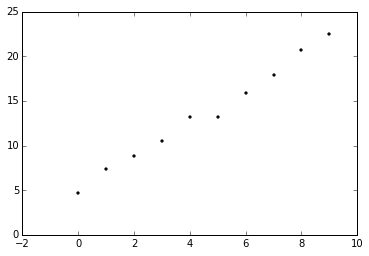

In [2]:
plt.scatter(x,y,marker='.',c='k');

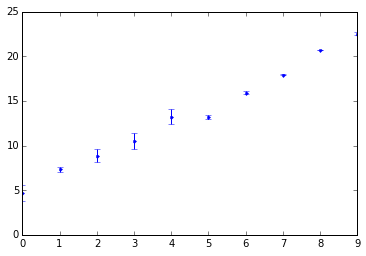

In [3]:
plt.errorbar(x,y,yerr=dy,marker='.',c='k',ls='None');

In [4]:
# This fits the data without taking uncertainties into account
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [5]:
slope, intercept

(1.9126991538208136, 4.8807213520774049)

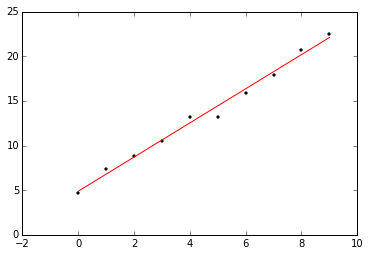

In [6]:
plt.scatter(x,y,marker='.',c='k')
plt.plot(x, slope*x+intercept,'r-',label = 'Fit with no errors');

In [7]:
slope2,intercept2 = np.polyfit(x,y,deg=1,w=1/dy)
slope2, intercept2

(2.150379918590366, 3.2365102504903382)

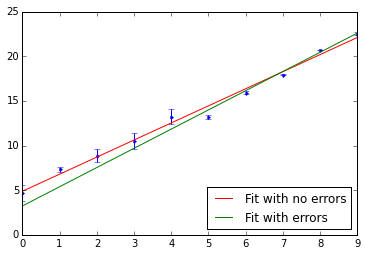

In [10]:
plt.errorbar(x,y,yerr=dy,marker='.',c='k',ls='None');
plt.plot(x, slope*x+intercept,'r-',label = 'Fit with no errors')
plt.plot(x, slope2*x+intercept2,'g-',label = 'Fit with errors')
plt.legend(loc='lower right');


### Model fitting from scratch. 

Let's now implement the chi2 approach.

The parameters I want to fit are slope, intercept.

Just by looking at the data I can tell that the slope should be somewhere between 1 and 3, and the intercept between 2.5 and 6

Our grid of possible models would then be

In [13]:
slopes = np.linspace(1,3,100) 
intercepts = np.linspace(2.5,6,100)
#note: these are already 10000 models (curse of dimensionality!)

For convenience, we can define two functions that describe our model (a straight line) and the chi2 function:

In [11]:
def model(x,m,b):
    return m*x+b #straight line

def chi2(m,b,x,y,err):
    return np.sum(((model(x,m,b) - y)**2)/err**2)

This line calculate chi2 values for our ... combinations

In [14]:
allchi2 = np.array([[chi2(m,b,x,y,dy) for m in slopes] for b in intercepts])

In [15]:
allchi2.shape

(100, 100)

The next step is to figure out what (slope,intercept) pair gives the minimum chi2. This can be done with np.argmin 
but the index of the minimum is calculated after flattening the array, so we need to use a trick to get the indices for rows and columns.

In [16]:
print(allchi2.min()) #min chi2 value
print(allchi2.argmin()) #index of min on flattened array
print(np.unravel_index(allchi2.argmin(), allchi2.shape)) #indices of minimum value as a (row, col) pair

186.460645542
2157
(21, 57)


In [17]:
#note that the inner (second) index is for slopes, the outer(first) index is for intercepts

print(slopes[57],intercepts[21]) #comes up pretty close to the result of np.polyfit.

2.15151515152 3.24242424242
